In [1]:
import numpy as np
from numpy.linalg import inv, norm
import matplotlib.pyplot as plt
from data import *
from regression import *
from template import show

In [2]:
def gauss_newton(func, jacobian, start, eps, max_iter):
    param = np.array(start)
    for i in range(max_iter):
        old_param = param
        
        J = jacobian(param)
        
        d = inv(J.transpose() @ J) @ J.transpose() @ func(param)
        param = old_param - d # NOTE: + -- if regression else -
        
        if norm(d) < eps:
            break
            
    return param

In [3]:
def square_regression(func, x, y, jacobian, start, eps, max_iter):
    return gauss_newton(regression(func, x, y), jacobian(x), start, eps, max_iter)

In [4]:
def create_test(func, jacobian):
    return lambda x, y, start, eps=1e-5, max_iter=1000:(
        gauss_newton(regression(func, x, y), jacobian(x), start, eps, max_iter))

In [5]:
N = 21
start = [0.5, 1, 4, 5, 1]

x = np.linspace(0, 5, N)
y = np.exp(x)

In [6]:
func, jac = funcs["pol"]

test = create_test(func, jac)
betta = test(x, y, start)

X = np.linspace(0, 5, N)
Y = func(X)(betta)

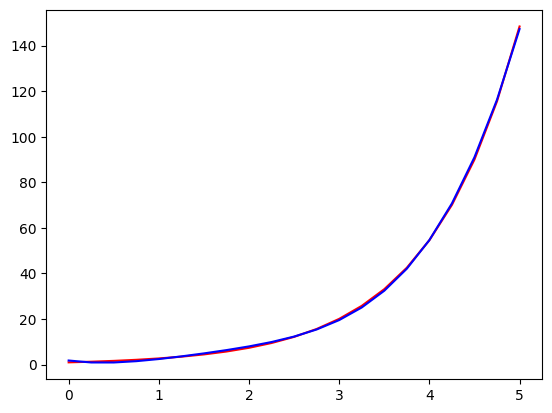

In [7]:
show(x, y, X, Y)

array([-0.24187295,  2.26833733, -1.27323157,  0.21623087, -0.01126603])

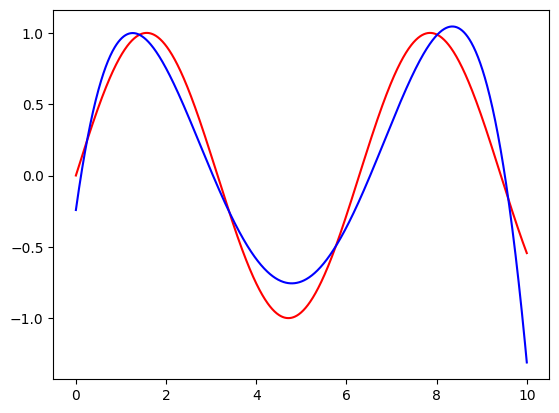

In [8]:
degree = 5
count = 10
steps = 1000
(test_x, test_y) = example.generate_test(np.sin, 0, count, steps)



betta = test(test_x, test_y, start, eps=1e-5, max_iter=1000)

X = np.linspace(0, count, steps)
Y = func(X)(betta)

show(test_x, test_y, X, Y)
betta